In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data1=pd.read_csv('../input/loan-prediction-dataset/train.csv')
data1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [2]:
data1.shape

(614, 13)

In [3]:
data1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [4]:
#rough idea on distribution of continuous variable
data1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


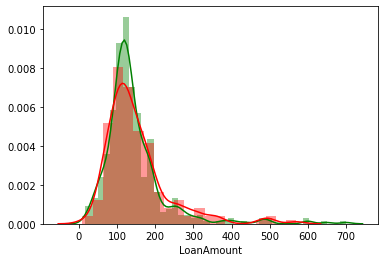

In [5]:
sns.distplot(data1[data1['Loan_Status']=='Y']['LoanAmount'],color='g', label="Approved")
sns.distplot(data1[data1['Loan_Status']=='N']['LoanAmount'],color='r', label="Not Approved")


In [6]:
#treatment of missing variable
data1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data1['LoanAmount']=data1['LoanAmount'].fillna(data1['LoanAmount'].median()) #fill by 50th percentile value
#data1['Married']=data1['Married'].fillna(data1['Married'].median()) #fill by 50th percentile value

In [8]:
data1.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

6.523526250899361


{'whiskers': [<matplotlib.lines.Line2D at 0x7f3b5d4d1a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3b5d4d74d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3b5d514290>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3b5d4d7f90>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b5d4c4a50>],
 'means': []}

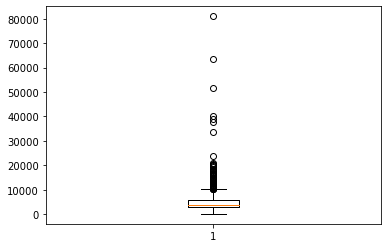

In [9]:
from scipy.stats import skew
print(skew(data1['ApplicantIncome']))
plt.boxplot(data1['ApplicantIncome']) #Outliears are present
#data is highly skewed, right skewed

In [10]:
data1['ApplicantIncome']=data1['ApplicantIncome'].clip(None, np.percentile(data1['ApplicantIncome'],95))

1.7119447438594193


{'whiskers': [<matplotlib.lines.Line2D at 0x7f3b5c3cb410>,
 'caps': [<matplotlib.lines.Line2D at 0x7f3b5c3cbe90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f3b5d48e110>],
 'medians': [<matplotlib.lines.Line2D at 0x7f3b5c3d3990>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f3b5c3d3ed0>],
 'means': []}

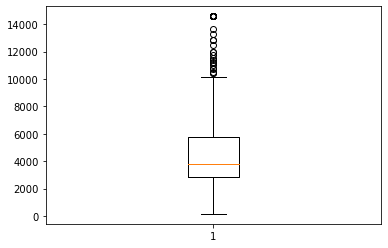

In [11]:
print (skew(data1['ApplicantIncome']))
plt.boxplot(data1['ApplicantIncome'])
#Skewness has come down post outlier treatment

In [12]:
#High Approval rates for male ?
data1['Loan_Status']=data1['Loan_Status'].map({'Y':1,'N':0})
male=data1[data1['Gender']=='Male']['Loan_Status'].mean()
male_c=data1[data1['Gender']=='Male']['Loan_Status'].count()
male_std=np.std(data1[data1['Gender']=='Male']['Loan_Status'])

female=data1[data1['Gender']=='Female']['Loan_Status'].mean()
female_c=data1[data1['Gender']=='Female']['Loan_Status'].count()
female_std=np.std(data1[data1['Gender']=='Female']['Loan_Status'])

In [13]:
z=(male-female)/(np.sqrt(male_std**2/male_c+female_std**2/female_c))
print (z)
df=male_c+female_c-2

#h0-means are same
#h1- means are different, male approval rate is higher than that of females

p=0.07
alpha=0.01
#p>alpha here, failed to reject null hypothesis. So  there is not enough evidence to suggest that males have higher approval rate.


0.48090274260944615


In [14]:
from scipy.stats import ttest_ind
ttest_ind(data1[data1['Gender']=='Male']['Loan_Status'], data1[data1['Gender']=='Female']['Loan_Status'])

Ttest_indResult(statistic=0.4860860523233649, pvalue=0.6270839280455408)

In [15]:
#Graduates getting have high salary?
grd=data1[data1['Education']=='Graduate']['ApplicantIncome'].mean()
grd_c=data1[data1['Education']=='Graduate']['ApplicantIncome'].count()
grd_std=np.std(data1[data1['Education']=='Graduate']['ApplicantIncome'])

ngrd=data1[data1['Education']=='Not Graduate']['ApplicantIncome'].mean()
ngrd_c=data1[data1['Education']=='Not Graduate']['ApplicantIncome'].count()
ngrd_std=np.std(data1[data1['Education']=='Not Graduate']['ApplicantIncome'])


In [16]:
z=(grd-ngrd)/(np.sqrt(grd**2/grd_c+ngrd_std**2/ngrd_c))
print (z)
#h0-graduate income and non graduate income no differece
#h1- graduate income higher than non-graduate income

p=0.0001
alpha=0.01
#p<alpha- reject the null hypothesis, there is strong evidence in against null hypothesis. Graduates earn higher income



5.08997149835223


In [17]:
ttest_ind(data1[data1['Education']=='Graduate']['ApplicantIncome'], data1[data1['Education']=='Not Graduate']['ApplicantIncome'])

Ttest_indResult(statistic=4.83562888187702, pvalue=1.6809901021110786e-06)

In [18]:
#Self Employed loan amount is higher than not self employed?
data1['Self_Employed']=data1['Self_Employed'].map({'Yes':1,'No':0})
slf=data1[data1['Self_Employed']==1]['LoanAmount'].mean()
slf_c=data1[data1['Self_Employed']==1]['LoanAmount'].count()
slf_std=np.std(data1[data1['Self_Employed']==1]['LoanAmount'])
nslf=data1[data1['Self_Employed']==0]['LoanAmount'].mean()
nslf_c=data1[data1['Self_Employed']==0]['LoanAmount'].count()
nslf_std=np.std(data1[data1['Self_Employed']==0]['LoanAmount'])

In [19]:
z=(slf-nslf)/(np.sqrt(slf_std**2/slf_c+nslf_std**2/nslf_c))
print (z)
p=0.0087
alpha=0.01
#H0- slf and non self employed means are same
#H1- slf employed loan mean is higher than that of non-self

#reject the null hypothesis


2.3790309616067273


In [20]:
from scipy.stats import ttest_ind
ttest_ind(data1[data1['Self_Employed']==1]['LoanAmount'], data1[data1['Self_Employed']==0]['LoanAmount'])

Ttest_indResult(statistic=2.9480824262887286, pvalue=0.0033262129354951005)

In [21]:
#Relationship between LoanAmount and ApplicantIncome?
data1[['LoanAmount','ApplicantIncome']].corr()

,LoanAmount,ApplicantIncome
LoanAmount,1.00000,0.59091
ApplicantIncome,0.59091,1.00000


In [22]:
data1['Property_Area'].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [23]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(data1['Property_Area'], data1['Loan_Status']))

#h0- Property_area and Loan Status are independent
#h1- Property_are and Loan Status are dependent

#reject null hypothesis at 0.01 significance level

(12.297623130485675,
 0.0021360187811644937,
 2,
 array([[ 55.97394137, 123.02605863],
        [ 72.85993485, 160.14006515],
        [ 63.16612378, 138.83387622]]))

In [24]:
chi2_contingency(pd.crosstab(data1['Credit_History'], data1['Loan_Status']))
#strong eveidence against Null hypothesis. There is strong relationship between Credit History and Loan Status

(174.63729658142535,
 7.184759548750746e-40,
 1,
 array([[ 28.2464539,  60.7535461],
        [150.7535461, 324.2464539]]))